<a href="https://colab.research.google.com/github/CrownPab/Brainstation/blob/master/BrainstationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolutional Neural Network (CNN):
This program takes x ray image data from a data set and uses a CNN to determine whether 
the patient has pneumonia or not. The reason I use a convolutional neural network in this program is because 
CNNs were actually designed for image data and are very good with image classification. CNNs learn the various features of an image and can detect features in various positions in the image which makes them very effective in image classification. 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import keras
from PIL import Image

file = os.listdir("/content/gdrive/My Drive/Brainstation/FinalProject/chest_xray") #imports the file full of x ray images into program 
print(file) #displays the contents of the folder containting the x rays images 

Mounted at /content/gdrive
['train', 'test', 'val', '.DS_Store']


In [0]:
from keras.utils import to_categorical

#Creating the training folders
train_Normal = '/content/gdrive/My Drive/Brainstation/FinalProject/chest_xray/train/NORMAL/'
train_Pneumonia = '/content/gdrive/My Drive/Brainstation/FinalProject/chest_xray/train/PNEUMONIA/'


#Seeing how many photos of normal x rays and pneumonia photos are available in the test folders 
print('Normal Training size :', len(os.listdir(train_Normal) ))
print('Pneumonia Training size :', len(os.listdir(train_Pneumonia)))



Normal Training size : 1342
Pneumonia Training size : 3876


Text(0.5, 1.0, 'Pneumonia')

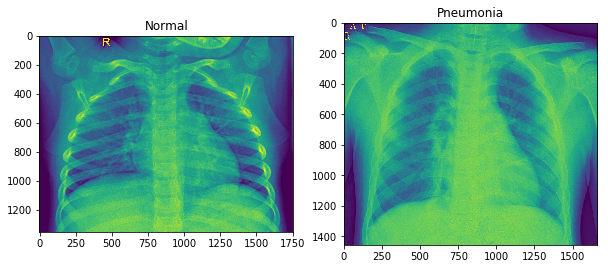

In [0]:
pic = os.listdir(train_Normal)[0] #picking an image from the normal folder 
pic2 = os.listdir(train_Pneumonia)[0] #picking an image from the pnemona folder

pic_address = train_Normal + pic #address of the directory 
pic_load = Image.open(pic_address) #loads image 

pic2_address = train_Pneumonia + pic2 #address of directory 
pic2_load = Image.open(pic2_address) #loads image 

#plots image of normal x ray
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(pic_load)
a1.set_title('Normal')

#plots image of pnemonia x ray 
a2 = f.add_subplot(1,2,2)
img_plot = plt.imshow(pic2_load)
a2.set_title('Pneumonia')



In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Activation
from tensorflow import keras as keras

In [0]:
image_height = 300
image_width = 300
num_epochs = 10 
 
model = Sequential() #Creating my model in a sequential order of layers 


model.add(Conv2D(32, (5, 5),  activation='relu', input_shape=(image_height, image_width, 3)))
'''
 32 filters 
 kernal size is 3x3 
 padding is set to same so that output value size is the same as input volum size 
 activation function relu 
'''
model.add(MaxPool2D(pool_size=(2, 2)))

'''
 Will downscale by 2 by 2
'''

model.add(Conv2D(32, (5, 5),  activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))



model.add(Conv2D(32, (5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5),  activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))          


model.add(Flatten()) #Brings all levels down into one plane 


model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))




model.summary()

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


W0810 19:34:39.469214 139923553175424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 19:34:39.486946 139923553175424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 19:34:39.491725 139923553175424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 19:34:39.514392 139923553175424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0810 19:34:39.610684 139923553175424 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 296, 296, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 144, 144, 32)      25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 68, 68, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        25632     
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator

#Generates image data  and allows for changes to be made to images 

train_datagen = ImageDataGenerator(rescale = 1./255)  #resales the images 

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Brainstation/FinalProject/chest_xray/train/',
                                                 target_size = (300, 300),
                                                 batch_size = 10,
                                                 )    #This allows me take images from the data set 



test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/Brainstation/FinalProject/chest_xray/test/',
                                                 target_size = (300, 300),
                                                 batch_size = 10,
                                                 )    #This allows me take images from the data set


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:
history=model.fit_generator(training_set,steps_per_epoch=64,epochs=8,validation_data=test_set,validation_steps=64)


Epoch 1/8
64/64 [==============================] - 193s 3s/step - loss: 0.4324 - acc: 0.8250 - val_loss: 0.7913 - val_acc: 0.6498
Epoch 2/8
64/64 [==============================] - 189s 3s/step - loss: 0.4661 - acc: 0.8453 - val_loss: 1.2987 - val_acc: 0.6498
Epoch 3/8
64/64 [==============================] - 186s 3s/step - loss: 0.2693 - acc: 0.8922 - val_loss: 0.3683 - val_acc: 0.8265
Epoch 4/8
64/64 [==============================] - 190s 3s/step - loss: 0.2227 - acc: 0.9109 - val_loss: 0.5780 - val_acc: 0.7823
Epoch 5/8
64/64 [==============================] - 191s 3s/step - loss: 0.2418 - acc: 0.9172 - val_loss: 0.5490 - val_acc: 0.7634
Epoch 6/8
64/64 [==============================] - 191s 3s/step - loss: 0.1450 - acc: 0.9328 - val_loss: 1.1041 - val_acc: 0.6909
Epoch 7/8
64/64 [==============================] - 189s 3s/step - loss: 0.1809 - acc: 0.9234 - val_loss: 0.5293 - val_acc: 0.8076
Epoch 8/8
64/64 [==============================] - 190s 3s/step - loss: 0.1339 - acc: 0.94

In [0]:
test_accu = model.evaluate_generator(test_set,steps=50)
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 80.56680095581874 %
